In [494]:
""" 
Class 8: Gradient Descent and Multiple Linear Regression
"""

import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline


%matplotlib notebook
plt.style.use(
    'deeplearning.mplstyle'
)

In [429]:
""" Define the task """
housing_dataset = pd.read_csv( "housing.csv")
housing_dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [430]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [431]:
housing_dataset = housing_dataset[['area', 'price']]
housing_dataset.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [432]:
""" Data Pipeline 

- Standardize the data
"""

mean = np.array(housing_dataset.mean())
print(mean)
std = np.array(housing_dataset.std())
print(std)

housing_dataset = (housing_dataset - mean) / std
housing_dataset.head()

[   5150.5412844  4766729.24770642]
[   2170.14102251 1870439.61565739]


,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716


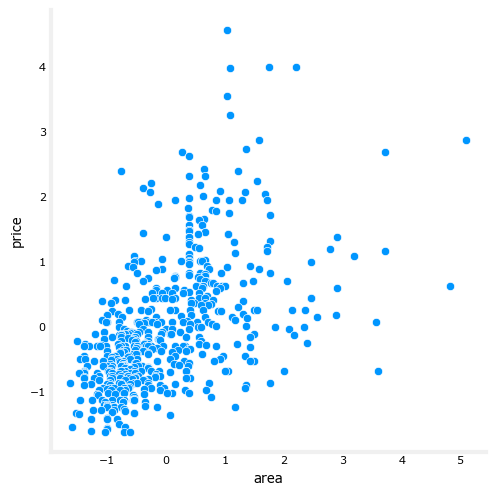

In [433]:
%matplotlib inline
sns.relplot(
    data=housing_dataset,
    x='area',
    y='price',
)


In [434]:
""" Machine Learning Algorithm """
def get_house_price(X, w, b):
    y_pred = w * X + b
    return y_pred

In [435]:
""" Initialize the parameters of the model """

w = np.random.randint(100, 200)
b = np.random.randint(100, 200)


print(w, b)

137 177


In [436]:
"""
zero-shot learning: learning without explicit training
"""
housing_dataset["price_pred_rand"] = get_house_price(housing_dataset["area"], w, b)
housing_dataset.head()

,area,price,price_pred_rand
0,1.045766,4.562174,320.269880
1,1.755397,4.000809,417.489368
2,2.216196,4.000809,480.618906
3,1.082630,3.982096,325.320243
4,1.045766,3.551716,320.269880


In [437]:
print(w,b)

137 177


In [438]:

#converting to probabilty
__ = housing_dataset.melt(
    value_vars=["price", "price_pred_rand"], 
    var_name="Type", 
    value_name="Price"
)

__['Price'] = __.groupby('Type')['Price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
__.head()

,Type,Price
0,price,1.000000
1,price,0.909091
2,price,0.909091
3,price,0.906061
4,price,0.836364


In [439]:
print(w,b)

137 177


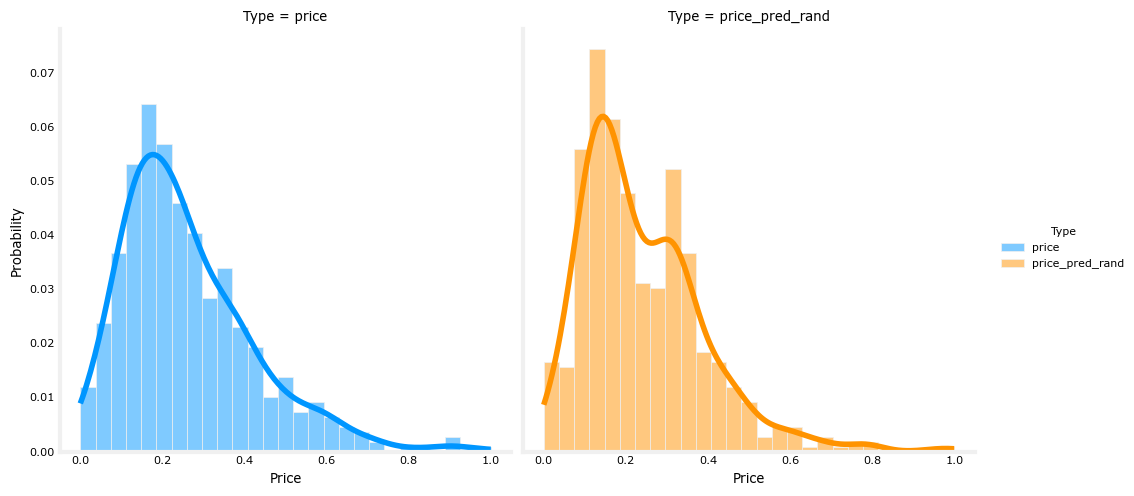

In [440]:
sns.displot(
    data=__,
    x="Price", 
    hue="Type", 
    kind="hist",
    stat='probability',
    kde=True,
    col='Type',
    fill=True,
)

In [441]:
price_hist, __ = np.histogram(housing_dataset['price'], bins=50, density=True)
price_pred_hist, __ = np.histogram(housing_dataset['price_pred_rand'], bins=50, density=True)
kl_divergence = entropy(price_hist + 1e-10, price_pred_hist + 1e-10)
print(f"KL Divergence is {kl_divergence}")

KL Divergence is 0.3658688885050693


In [442]:
print(w,b)

137 177


In [443]:
""" Cost function
ML Learning algorithm:
1. Maximize likelihood between true distribution and predicted distribution
Alternatively, minimizing the KL divergence
Alternatively, minimizing loss/cost function

- We want to maximize likelihood between true distribution and predicted distribution
- We want to minimize dissimilarity between true distribution and predicted distribution
- We want to minimize the KL Divergence between true distribution and predicted distribution
- We consider a function that would minimize the KL divergence if it itself minimizes


- This function is called cost function
- Cost function is often task specific

- We will use Mean Squared Error as our cost function

y = 10, yhat = 12, e1 = (y-yhat)^2 = 4
y = 5, yhat = 6,   e2 = (5-6)^2 = 1
y = 2, yhat = 2, e3 = 0

e = (e1+e2+e3)/3 = (4+1+0)/3 = 5/3
"""

def cost_function(x, y_true, w, b):
    y_pred = get_house_price(x, w, b)
    mse = np.mean((y_true - y_pred) ** 2) / 2
    return mse

X = housing_dataset['area']
y_true = housing_dataset['price']

loss = cost_function(X, y_true, w, b)
print(loss)

24958.98291708963


In [444]:
print(w,b)

137 177


In [445]:
print(w,b)

137 177


In [446]:
loss_1 = cost_function(X, y_true, w=100, b=125)
print(loss_1)

loss_2 = cost_function(X, y_true, w=124, b=189)
print(loss_2)

loss_3 = cost_function(X, y_true, w=112, b=169)
print(loss_3)

12750.323384201232
25468.550941363657
20481.569272874185


In [447]:
print(w,b)

137 177


In [448]:
weights = np.linspace(-10, 10, 100)
biases = np.linspace(-10, 10, 100)
weights_mesh, biases_mesh = np.meshgrid(weights, biases)
losses_mesh = []
for w in tqdm(np.ravel(weights_mesh[0])):
    for b in np.ravel(biases_mesh[0]):
        loss = cost_function(X, y_true, w, b)        
        losses_mesh.append(loss)
        
losses_mesh = np.array(losses_mesh)
losses_mesh = losses_mesh.reshape(weights_mesh.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 39.98it/s]


In [449]:
print(w,b)

10.0 -10.0


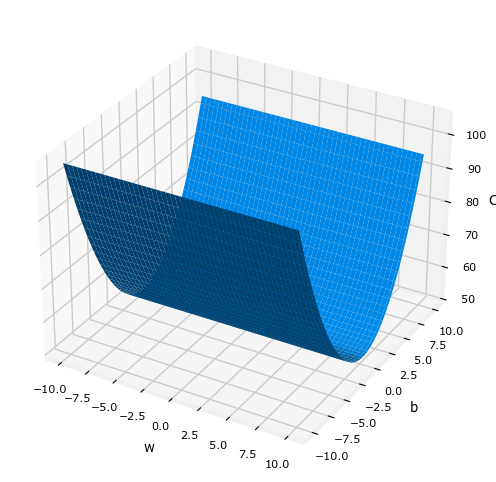

In [450]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(weights_mesh, biases_mesh, losses_mesh)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.show()

In [451]:
print(w,b)

10.0 -10.0


In [452]:
print(w,b)

10.0 -10.0


In [453]:
""" Gradient Descent Algorithm 

- Compute Gradient
- Update Gradient
"""

def compute_gradient(X, y_true, w, b):
    delta = 0.0000000001
    cost_1 = cost_function(X, y_true, w, b)
    cost_2 = cost_function(X, y_true, w + delta, b)
    cost_3 = cost_function(X, y_true, w, b + delta)
    dw = (cost_2 - cost_1) / delta
    db = (cost_3 - cost_1) / delta
    return dw, db

In [454]:
print(w, b)

10.0 -10.0


In [455]:
loss = cost_function(X, y_true, w, b)
print(loss)

95.0572008054445


In [456]:
dw, db = compute_gradient(X, y_true, w, b)
print(dw, db)

9.446807780477684 -9.999752137446194


In [457]:
"""
let dw is 3.5, w = w - dw
let dw is -3.5, w = w + dw = w - (-dw)

learning rate 0.0001 - 0.00001
"""
learning_rate = 0.001
w = w - learning_rate * dw
b = b - learning_rate * db

In [458]:
print(w,b)

9.990553192219522 -9.990000247862554


In [459]:
loss = cost_function(X, y_true, w, b)
print(loss)

94.86805725206128


In [460]:
for epoch in range(10000):
    # Calculate logits
    loss = cost_function(X, y_true, w, b)
    # Calculate the gradients
    dw, db = compute_gradient(X, y_true, w, b)
    
    # Update weights
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    if epoch % 1000 == 0:
        print(loss)

94.86805725206128
13.155962187895822
2.089305941666604
0.5904917318940431
0.3874989045263737
0.3600063580315929
0.3562828627899758
0.35577856378958855
0.35571026286819163
0.3557010122997254


In [461]:
print(w,b)

0.5364323621315137 -0.0004512803919354269


In [462]:
housing_dataset.head()

,area,price,price_pred_rand
0,1.045766,4.562174,320.269880
1,1.755397,4.000809,417.489368
2,2.216196,4.000809,480.618906
3,1.082630,3.982096,325.320243
4,1.045766,3.551716,320.269880


In [469]:
housing_dataset["price_pred_learned"] = get_house_price(housing_dataset["price"], w, b)
housing_dataset.head()

,area,price,price_pred_rand,price_pred_learned
0,1.045766,4.562174,320.269880,2.446846
1,1.755397,4.000809,417.489368,2.145712
2,2.216196,4.000809,480.618906,2.145712
3,1.082630,3.982096,325.320243,2.135674
4,1.045766,3.551716,320.269880,1.904804


In [485]:
__ = housing_dataset.melt(
    value_vars=["price", "price_pred_learned"], 
    var_name="Type", 
    value_name="Price"
)

__['Price'] = __.groupby('Type')['Price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

__.head()


,Type,Price
0,price,1.000000
1,price,0.909091
2,price,0.909091
3,price,0.906061
4,price,0.836364


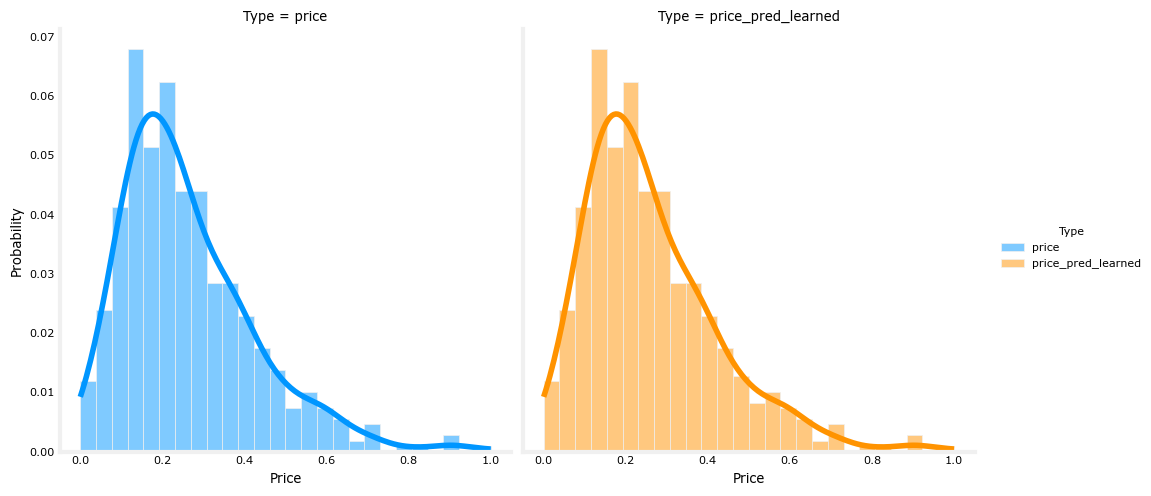

In [493]:
sns.displot(
    data=__,
    x="Price", 
    hue="Type", 
    kind="hist",
    stat='probability',
    kde=True,
    col='Type',
    fill=True,
    multiple='stack',
)

In [466]:
price_hist, __ = np.histogram(housing_dataset['price'], bins=50, density=True)
price_pred_rand_hist, __ = np.histogram(housing_dataset['price_pred_rand'], bins=50, density=True)
kl_divergence_rand = entropy(price_hist + 1e-10, price_pred_rand_hist + 1e-10)
print(f"KL Divergence before learning is {kl_divergence_rand}")

price_pred_rand_hist, __ = np.histogram(housing_dataset['price_pred_learned'], bins=50, density=True)
kl_divergence_learned = entropy(price_hist + 1e-10, price_pred_rand_hist + 1e-10)
print(f"KL Divergence after learning is {kl_divergence_learned}")

KL Divergence before learning is 0.3658688885050693
KL Divergence after learning is 0.4588466161125105


In [467]:
# linear regression: "x -> y": w * x + b (parameters: w, b)
# multiple linear regression: x1, x2, x3 -> y: w1 * x1 + w2 * x2 + w3 * x3 + b (params: w1, w2, w3, b)